In [109]:
%load_ext autoreload
%autoreload 2

import detectron2
from detectron2.utils.logger import setup_logger

setup_logger()
import cv2
import pandas as pd
from detectron2.data import MetadataCatalog
import torch
from utils import read_json, get_instance_pretrained_predictor, cv2_imshow, predict_instance_segmentation
import numpy as np
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
mapping = read_json('mapping.json')
color_mapping = mapping['color_mapping']
class_mapping = mapping['class_mapping']
coco_classes = mapping['coco_classes']
cfg, predictor = get_instance_pretrained_predictor()

In [119]:
dataset = 'super-robust'
img_dir = f'../data/{dataset}/rgb/'
gt_dir = f'../data/{dataset}/semantic/'
acc = {c: [] for c in color_mapping}
for img_idx in tqdm(range(5600)):
# read image and convert to rgb
    im = cv2.imread(f'{img_dir}/{img_idx:06}.png')[:, :, ::-1]
    gt = cv2.imread(f'{gt_dir}/{img_idx:06}.png')[:, :, ::-1]


    # predictor takes BGR value
    output = predictor(im[:, :, ::-1])
    instances = set([class_mapping[coco_classes[i]] for i in output['instances'].pred_classes.cpu() if
                 coco_classes[i] in class_mapping])

    for name, color in color_mapping.items():
        # check if a pixel represent the class exists
        type_exists = np.all(gt == color, axis=2).any()
        if type_exists == (name in instances):
            acc[name].append(1)
        else:
            acc[name].append(0)


  0%|          | 0/5600 [00:00<?, ?it/s]c:\users\chenp\documents\github\detectron2\detectron2\structures\image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
100%|██████████| 5600/5600 [15:00<00:00,  6.22it/s]


In [120]:
for t in acc:
    print(t)
    print(sum(acc[t]) / len(acc[t]))

pedestrian
0.7628571428571429
vehicle
0.9996428571428572
traffic light
0.5807142857142857


In [121]:
acc_df = pd.DataFrame(acc)
acc_df.to_csv(f'{dataset}.csv', index=None)

Instances(num_instances=5, image_height=720, image_width=1280, fields=[pred_boxes: Boxes(tensor([[  38.5289,  346.7442,  252.6508,  429.8230],
        [ 580.2855,  364.8600,  678.7281,  436.7513],
        [1010.3669,    4.0673, 1274.3734,  298.4798],
        [ 582.8107,  364.9237,  678.9636,  441.5102],
        [ 273.8103,  324.2180,  295.5270,  391.0560]], device='cuda:0')), scores: tensor([0.9957, 0.8007, 0.7886, 0.6329, 0.6087], device='cuda:0'), pred_classes: tensor([ 2,  2, 25, 28,  0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, 

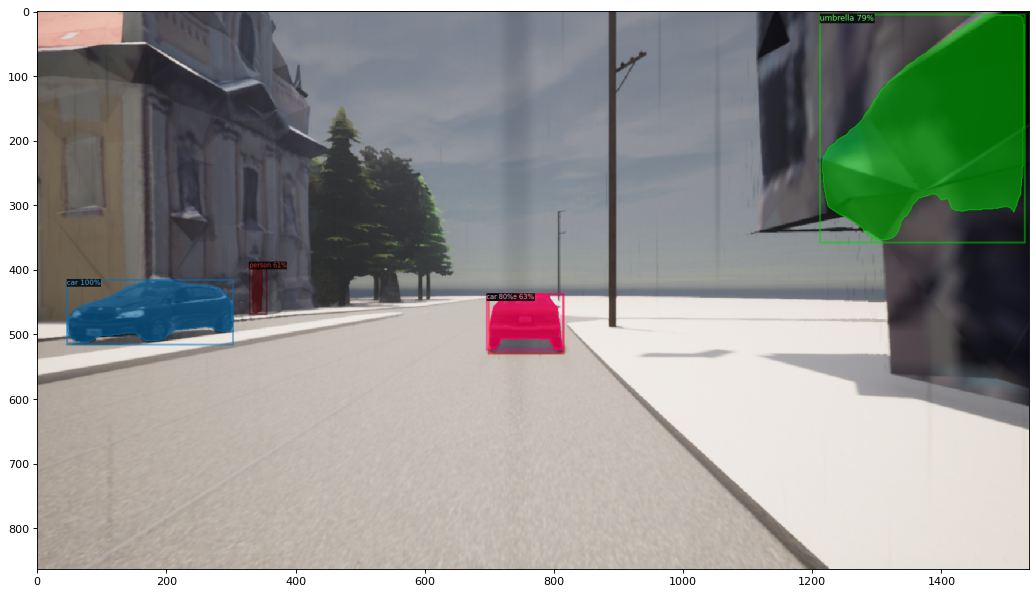

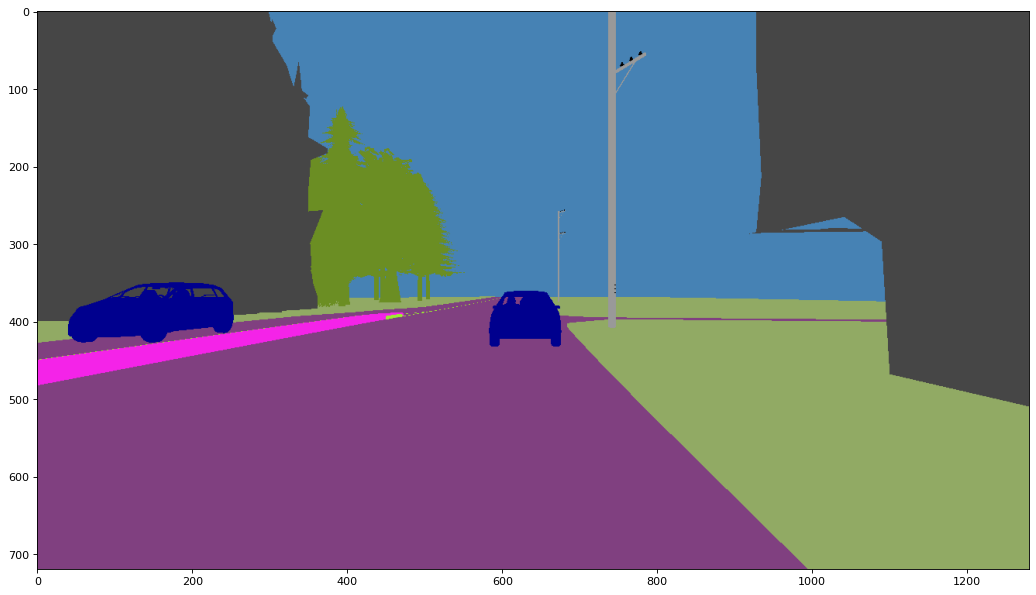

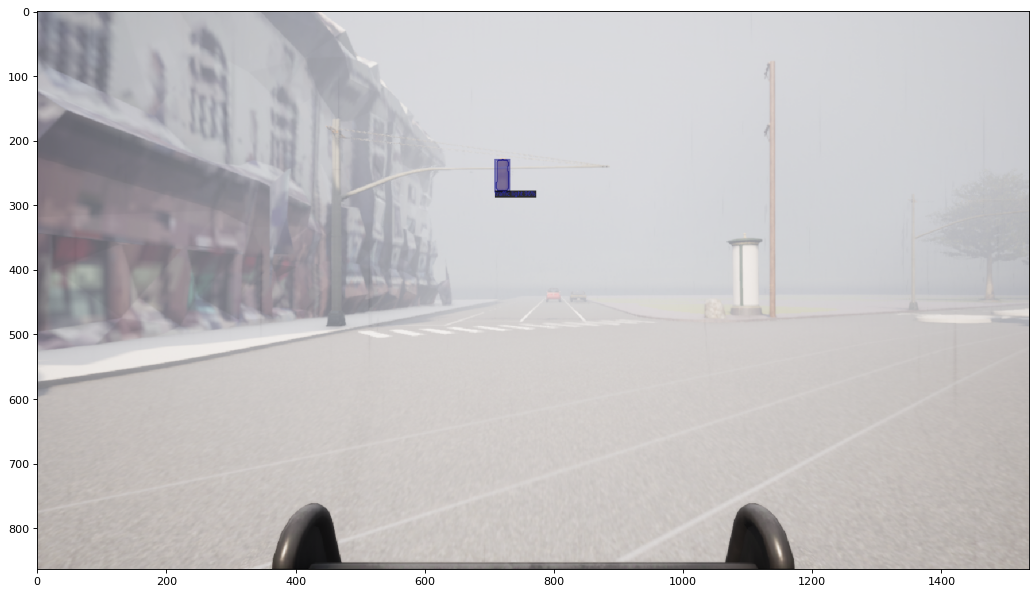

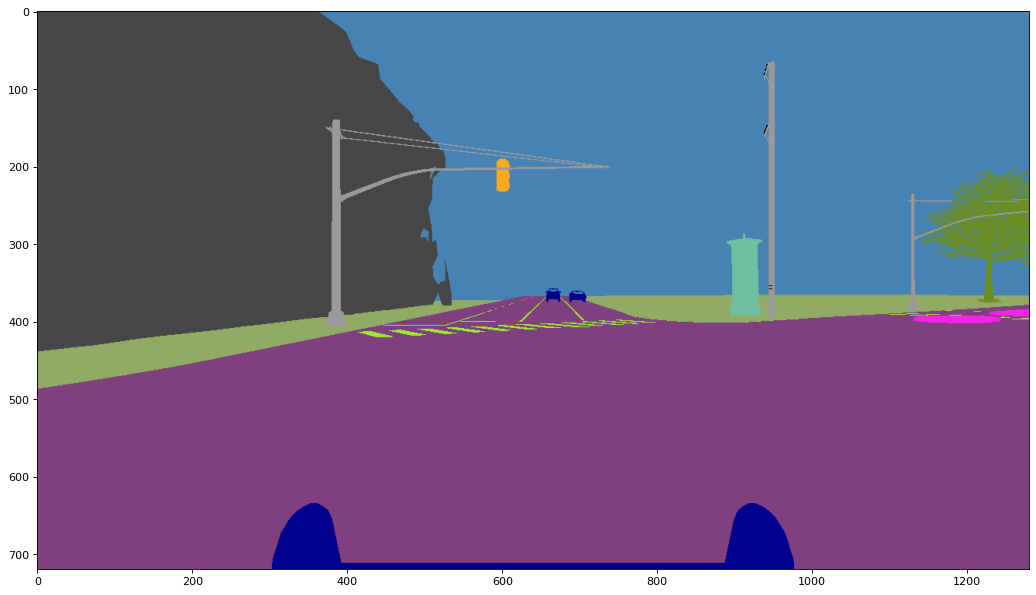

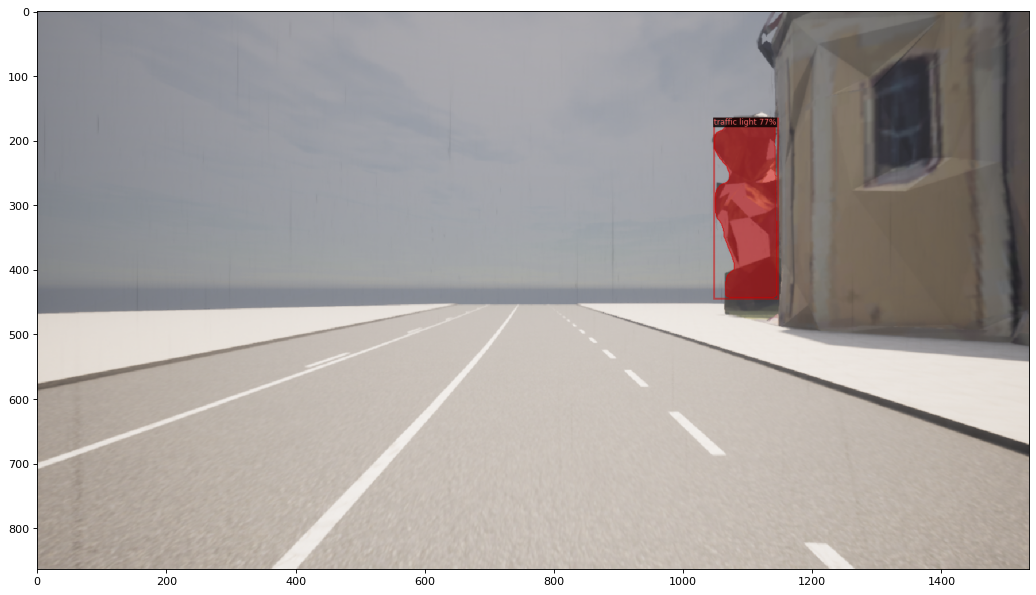

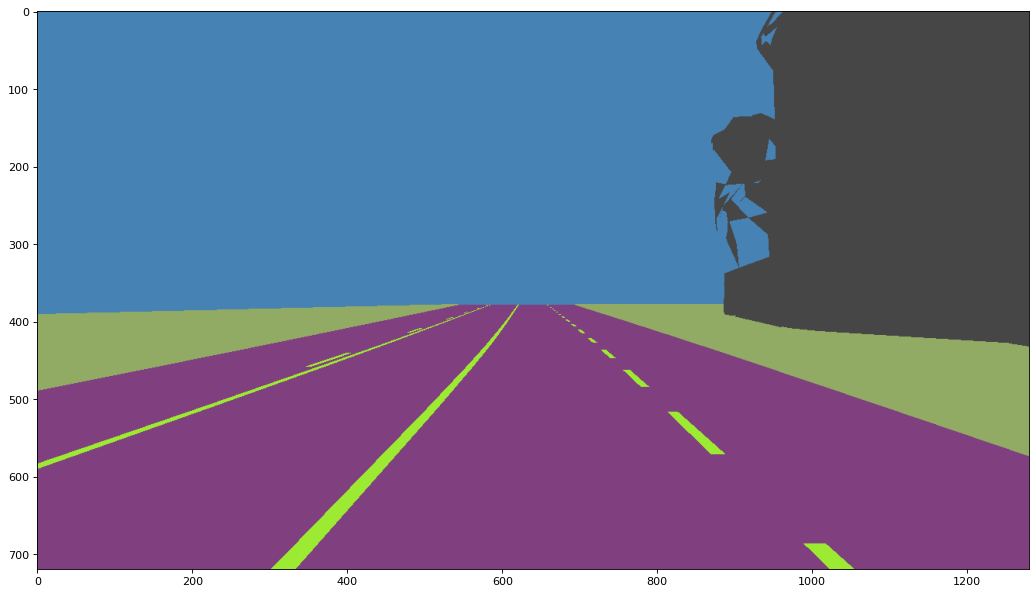

In [105]:
for t in acc:
    img_idx = acc[t].index(0)
    im = cv2.imread(f'{img_dir}/{img_idx:06}.png')[:, :, ::-1]
    gt = cv2.imread(f'{gt_dir}/{img_idx:06}.png')[:, :, ::-1]
    out = predict_instance_segmentation(im[:, :, ::-1], predictor, cfg)
    cv2_imshow(out.get_image()[:, :, ::-1])
    cv2_imshow(gt[:, :, ::-1])

c:\users\chenp\documents\github\detectron2\detectron2\structures\image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


Instances(num_instances=5, image_height=720, image_width=1280, fields=[pred_boxes: Boxes(tensor([[298.7679, 351.8867, 614.1502, 443.4578],
        [ 32.9288, 321.1806, 209.2191, 391.3729],
        [ 17.9236, 169.5340,  45.5168, 218.5229],
        [228.2235, 355.5797, 312.7974, 383.5627],
        [653.5645, 341.1397, 833.2371, 418.2947]], device='cuda:0')), scores: tensor([0.9990, 0.9624, 0.9531, 0.8383, 0.7522], device='cuda:0'), pred_classes: tensor([2, 7, 9, 2, 2], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [

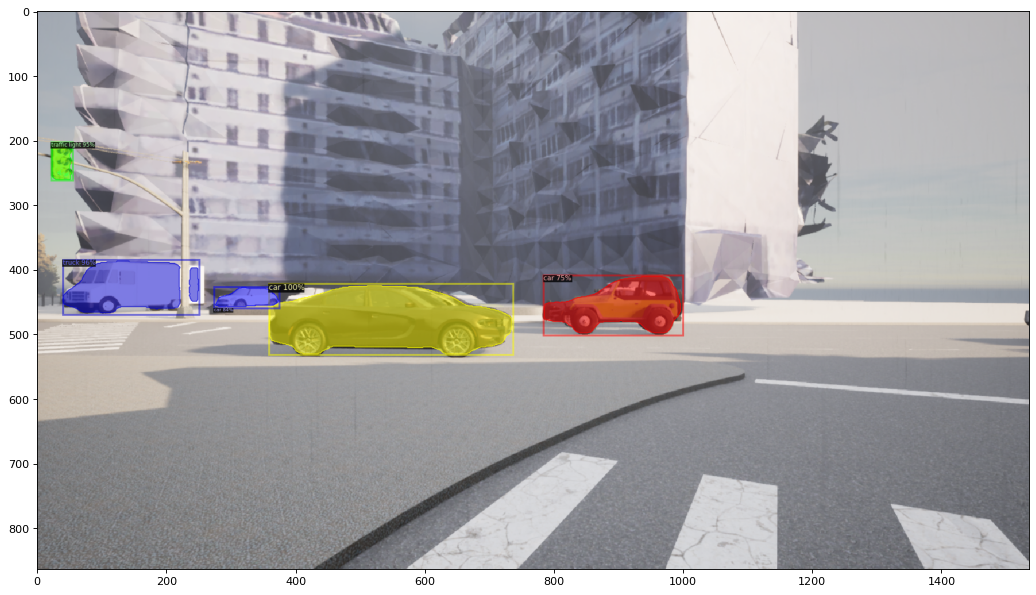

In [40]:
print(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
c:\users\chenp\documents\github\detectron2\detectron2\structures\image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
C:\Users\chenp\Documents\github\detectron2\projects\PointRend\point_rend\point_features.py:142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mod

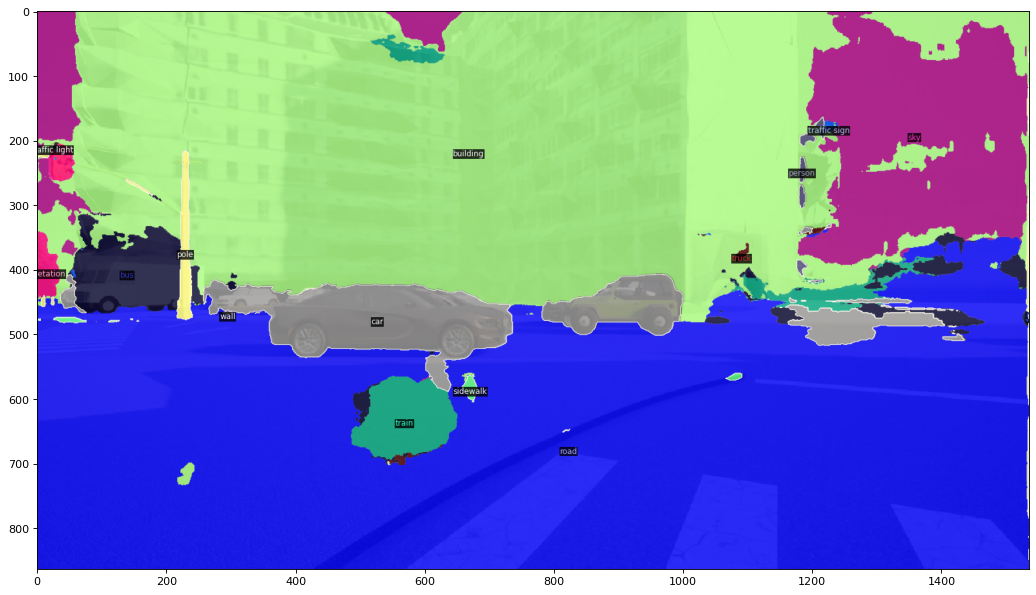

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
